<h2>Preparando os dados</h2>

<h3>Índice</h3>

<h3>Introdução</h3>

<h3>Importando as bibliotecas</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Pandas: ' + pd.__version__)
print('Numpy: ' + np.__version__)
print('Seaborn: ' + sns.__version__)

Pandas: 0.24.2
Numpy: 1.18.1
Seaborn: 0.9.0


<h3>Primeira visualização dos dados</h3><br>

<font size=3>Vamos importar o dataset e mostrar os primeiros registros.</font>

In [2]:
df_train = pd.read_csv('./dataset/train.csv')
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font size=3>Verificando os tipos das variáveis.</font>

In [3]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<font size=3>Estastísticas descritivas das variáveis numéricas.</font>

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<font size=3>Porcentagem de dados faltantes no dataset.</font>

In [5]:
df_train.isnull().sum().sort_values(ascending=False)/df_train.shape[0]

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

<h3>Compreendendo as variáveis</h3><br>

<font size=3>Plotando em uma _mapa de calor_ a _correlação_ entre cada variável numérica.</font>

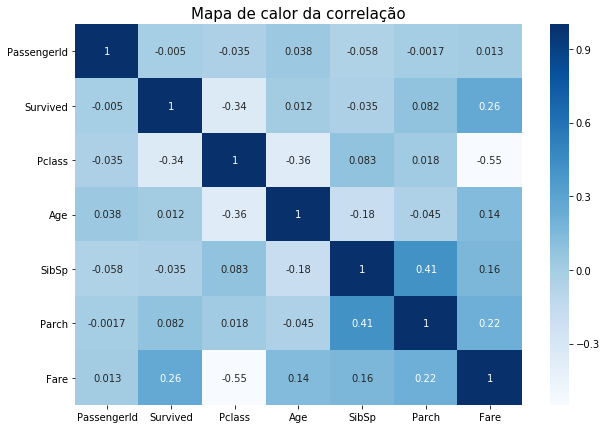

In [36]:
plt.figure(figsize=(10,7))
plt.title('Mapa de calor da correlação', fontsize=15)
sns.heatmap(df_train.corr(),
            annot=True,
            cmap='Blues');

<font size=3>Verificando a quantidade de sobrevintes e não sobreviventes.</font>

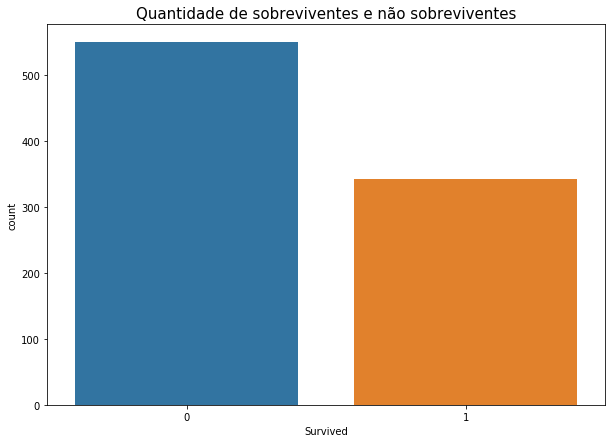

In [37]:
plt.figure(figsize=(10,7))
plt.title('Quantidade de sobreviventes e não sobreviventes', fontsize=15)
sns.countplot(df_train['Survived']);

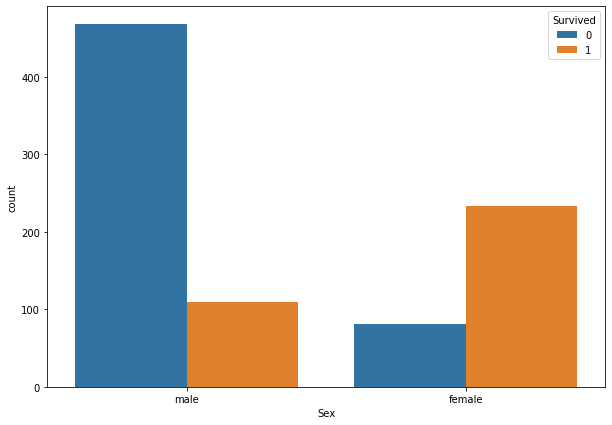

In [49]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_train,
              x='Sex',
              hue='Survived');

<font size=3>Verificando a disparidade entre as ditribuições de idade dos sobriventes ou não.</font>

<font size=3>Verificando a disparidade entre as ditribuições do preço da passagem paga pelos sobriventes ou não.</font>

<font size=3>Verificando a razão de sobreviventes por classe, nesse gráfico podemos perceber que é mais provável da pessoa sobreviver se for da _primeira classe_.</font>

<font size=3>Razão de sobreviventes de acordo com o número de pais/filhos, e aparentemente quem estava com 1 ou 2 parentes teve mais chances de sobreviver.</font>

<font size=3>Razão de sobreviventes de acordo com a quantidade de membros da família, contabilizando filhos e conjuge, e novamente percebemos que quem tinha 1 ou 2 membros teve a probabilidade maior de sobreviver.</font>

<font size=3>Razão de sobreviventes de acordo com o porto em que embarcou.</font>

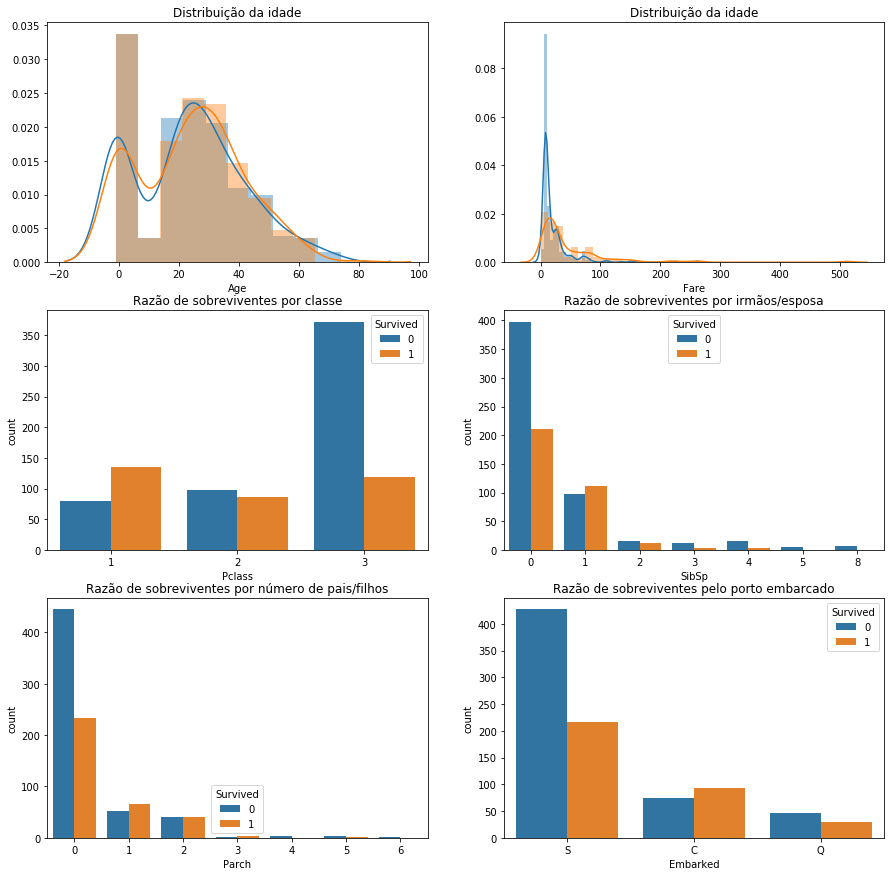

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# Gráfico 0x0 - Distribuição da idade entre sobreviventes e não sobreviventes
ax[0, 0].set_title('Distribuição da idade')
df_train['Age'] = df_train['Age'].fillna(-1)
sns.distplot(df_train[df_train['Survived']==0]['Age'], ax=ax[0, 0]);
sns.distplot(df_train[df_train['Survived']==1]['Age'], ax=ax[0, 0]);
# Gráfico 0x1- Distribuição do preço da passagem paga
ax[0, 1].set_title('Distribuição da idade')
sns.distplot(df_train[df_train['Survived']==0]['Fare'], ax=ax[0, 1]);
sns.distplot(df_train[df_train['Survived']==1]['Fare'], ax=ax[0, 1]);
# Gráfico 1x0 - Razão de sobreviventes por classe
ax[1, 0].set_title('Razão de sobreviventes por classe')
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1, 0]);
# Gráfico 1x1 - Razão de sobreviventes por número de irmãos/esposa
ax[1, 1].set_title('Razão de sobreviventes por irmãos/esposa')
sns.countplot(data=df_train, x='SibSp', hue='Survived', ax=ax[1, 1]);
# Gráfico 2x0 - Razão de sobreviventes por número de pais/filhos
ax[2, 0].set_title('Razão de sobreviventes por número de pais/filhos')
sns.countplot(data=df_train, x='Parch', hue='Survived', ax=ax[2, 0]);
# Gráfico 2x1 - Razão de sobreviventes pelo porto embarcado
ax[2, 1].set_title('Razão de sobreviventes pelo porto embarcado')
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[2, 1]);